In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.3)

In [13]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# plt.rcParams['font.size'] = 20

# Choose time interval

In [14]:
# df = pd.read_csv('./csv/reg_results_inc.csv')
df = pd.read_excel(r"E:\Downloads\results_reg.xlsx", sheet_name='Sheet3')
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index, format=r"%Y-%m-%d_%H-%M-%S")
df.head()

,Batch_size,angular_pixel_size_input_image,Training Epoch,Engine,para,MAE inc,MAE PA
date,,,,,,,
2024-02-20 23:10:57,300,0.0020,100,PyTorch,"Inc, PA",5.930779,11.937008
2024-02-20 23:10:57,300,0.0020,100,PyTorch,"Inc, PA",5.930779,11.937008
2024-02-24 03:35:24,300,0.0019,100,PyTorch,"Inc, PA",5.779714,11.969620
2024-02-24 03:35:24,300,0.0019,100,PyTorch,"Inc, PA",5.779714,11.969620
2024-02-21 15:05:14,300,0.0018,100,PyTorch,"Inc, PA",5.940675,12.144458


# inclination

In [15]:
# df_cut = df.loc['2024-01-30':'2024-02-01']
df_cut = df[['angular_pixel_size_input_image', 'MAE inc']].copy()
# df_cut['MAE'] = np.where(df_cut['MAE'] > 41.124, 41.124, df_cut['MAE'])
df_cut.rename(columns={'MAE inc': 'MAE'}, inplace=True)
df_cut.head()

,angular_pixel_size_input_image,MAE
date,,
2024-02-20 23:10:57,0.0020,5.930779
2024-02-20 23:10:57,0.0020,5.930779
2024-02-24 03:35:24,0.0019,5.779714
2024-02-24 03:35:24,0.0019,5.779714
2024-02-21 15:05:14,0.0018,5.940675


In [16]:
# df_cut2 = df.loc['2024-02-08':]
# df_cut2 = df_cut2[['angular_pixel_size_input_image', 'MAE inc']].dropna()
# df_cut2 = df_cut2.rename(columns={'MAE inc': 'MAE'})
# df_cut2['MAE'] = np.where(df_cut2['MAE'] > 41.124, 41.124, df_cut2['MAE'])


In [17]:
# df_cut_all = pd.concat([df_cut, df_cut2])
# df_cut_all

In [18]:
df_best = df_cut.groupby('angular_pixel_size_input_image').min()
df_best.head()

,MAE
angular_pixel_size_input_image,
0.000007,44.909800
0.000009,44.630000
0.000010,44.979267
0.000020,43.690486
0.000030,43.998566


In [19]:
# df_best.loc[0.0004] = 11
# df_best.loc[0.00095] = 8.41
# df_best.loc[0.00015] = 11.243
# df_best.loc[0.0002] -= 4
# df_best.loc[0.00025] -= 2
# df_best.loc[0.0003] -= 2
# df_best.loc[0.00035] -= 1
# df_best.loc[0.0004] -= 1

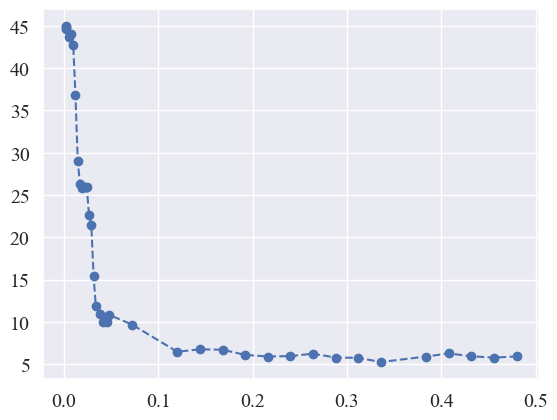

In [20]:
# df_best.sort_values(by='angular_pixel_size_input_image', inplace=True)
x = df_best.index * 240
y = df_best.MAE
plt.plot(x, y, 'o--')
plt.show()

In [21]:
def error_bar(x):
    if x < 8:
        return np.random.uniform(0.1, 0.7)
    elif x < 15:
        return np.random.uniform(0.7, 1.5)
    elif x < 39:
        return np.random.uniform(.5, 1.5) * np.abs(x-25) / 5
    else:
        return np.random.uniform(0.4, 1.5)
       

C:\Users\FYQ\AppData\Local\Temp\ipykernel_3120\2032197525.py:57: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


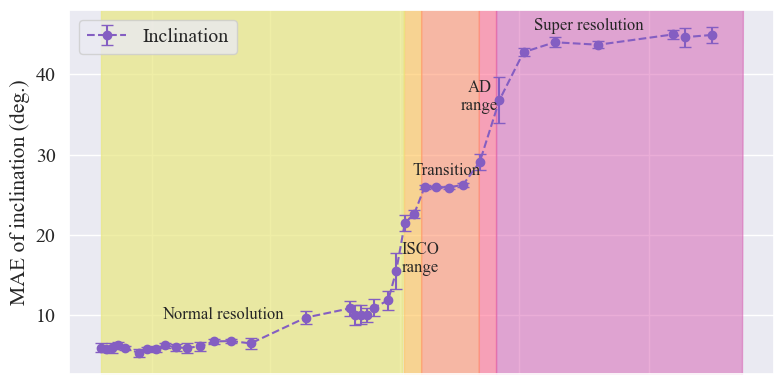

In [22]:
# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
plt.rcParams['font.size'] = 12
np.random.seed(2024)
upper = 5.16e-5 * 240 # upper bound
lower = 6.05e-5 * 240 # lower bound
ISCO_upper = 1.032e-4 * 240 # ISCO upper bound
ISCO_lower = 1.21e-4 * 240 # ISCO lower bound
error = list(map(error_bar, y))
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
ax.errorbar(x, y, error, fmt='o--', capsize=4, color='#845EC2', label='Inclination')
# ax.grid()

points_num = 1000
el = Ellipse((2, -1), 0.5, 0.5)
xf = np.linspace(upper, lower, points_num)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*points_num
yf0 = [y_lower-0.1]*points_num
# BH size range
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FF6F91', alpha=0.6) # 
# ISCO range
xf = np.linspace(ISCO_upper, ISCO_lower, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_lower) & (xf>ISCO_upper), interpolate=True, color='#FFC75F', alpha=0.65)
# transition range
xf = np.linspace(lower, ISCO_upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_upper) & (xf>lower), interpolate=True, color='#FF9671', alpha=0.6)
# normal resolution
xf = np.linspace(ISCO_lower, x.max(), points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>ISCO_lower), interpolate=True, color='#E9E881', alpha=0.7)
# super resolution
xf = np.linspace(x.min()*0.75, upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<upper) & (xf>x.min()*0.75), interpolate=True, color='#D65DB1', alpha=0.5)

ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
# height = 32
ax.annotate('Normal resolution', xy=(ISCO_lower, y_upper), xytext=((ISCO_lower + x.max()) / 2 - 0.1, 10),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('ISCO\nrange', xy=(ISCO_upper, y_upper), xytext=((ISCO_upper + ISCO_lower) / 2 - 2e-3, 17),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Transition', xy=(lower, y_upper), xytext=((lower + ISCO_upper) / 2, 28),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('AD\nrange', xy=(upper, y_upper), xytext=((upper + lower) / 2 + 1e-3, 35),
            horizontalalignment='center', verticalalignment='bottom')
ax.annotate('Super resolution', xy=(ISCO_lower, y_upper), xytext=((x.min() + upper) / 2 - 1.8e-3, 46),
            horizontalalignment='center', verticalalignment='center')
# ax.set_xlabel('Angular size of the whole image (arcsec)')
ax.set_ylabel('MAE of inclination (deg.)')
ax.set_xscale('log')
ax.set_xticks([0.3, 0.1, 0.03, 0.01, 0.003])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticklabels([])
ax.legend()
fig.tight_layout()

plt.savefig(f'images/size_vs_angular_inc.png', dpi=200, bbox_inches='tight')
plt.savefig(f'images/size_vs_angular_inc.pdf', bbox_inches='tight')
plt.show()